In [81]:
# import library
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# font set
font_path = '/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

#- ! bs4 모듈이 설치되어 있어야 합니다. -#

sns.get_dataset_names()

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [82]:
# data import and check
'''
total_bill : 테이블의 전체 지불 금액
tip : 팁으로 낸 금액
sex : 웨이터의 성별
smoker : 손님의 흡연 여부
day : 요일
time : 시간
size : 테이블 인원수
'''
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()


(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [83]:
# 범주형 data ==> dummy data 로 변ㄴ경
tips = pd.get_dummies(tips, columns=['sex','smoker','day','time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [84]:
# column 순서 정렬
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


In [85]:
# 12개의 x w 

### 선형 회귀
- 선형 방정식 을 통해 회귀 문제를 푼다 
- 회귀 라는 단어는 연속된 실수값을 예측하는 문제 를 뜻합니다.
- 회귀와 대립되는 개념은 분류


In [86]:
# train / test <data 분리
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
X

array([[16.99,  2.  ,  0.  , ...,  1.  ,  0.  ,  1.  ],
       [10.34,  3.  ,  1.  , ...,  1.  ,  0.  ,  1.  ],
       [21.01,  3.  ,  1.  , ...,  1.  ,  0.  ,  1.  ],
       ...,
       [22.67,  2.  ,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [17.82,  2.  ,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [18.78,  2.  ,  0.  , ...,  0.  ,  0.  ,  1.  ]])

In [87]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(195, 12) (195,)
(49, 12) (49,)


In [98]:
# w b 값 랜덤하게 색출
W= np.random.rand(12)
b = np.random.rand()
W, b

(array([0.95289421, 0.65497733, 0.06686323, 0.60470319, 0.84039801,
        0.51881601, 0.86396137, 0.68341411, 0.59531444, 0.98846534,
        0.39770864, 0.34011213]),
 0.49822809115744704)

In [99]:
# model 구현
'''
y=w1x1+w2x2+w3x3+w4x4+w5x5+w6x6+w7x7+w8x8+w9x9+w10x10+w11x11+w12x12+b
'''
def model(X,W,B):
    p = 0
    for i in range(12):
        #print(X[:])
        p = p + X[:, i]*W[i]
    p = p+b
    return p
    

In [100]:
# 손실함수 정의 MSE 사용
def MSE(a,b):
   return ((a-b)**2).mean()# 두값 차이의 제곱의 평균

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [101]:
#기울기 함수 구하기
def gradient(X,W,b,y):
    # 가중치 개수
    N = len(W)
    
    # 예측값 
    y_pred = model(X,W,b)
    dw = 1/N * 2 * X.T.dot(y_pred-y) # T.DOT  ????T : 행렬 / 곱
    
    db = 2* (y_pred-y).mean()
    
    return dw, db
    

In [102]:
# 기울기 도출..
dW, db = gradient(X,W,b,y)
print("dW:", dW)
print("db:", db)

dW: [19008.76290075  2291.54992784   543.13579185   273.69547287
   326.07528566   490.75597906   190.07650627    55.81282707
   296.98585263   273.95607875   203.13965025   613.69161446]
db: 40.17202941226118


In [103]:
# 하이퍼 파람 설정
LEARNING_RATE = 0.0001


In [104]:
# 손실 함수 1000번 시행.
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2.0851
Iteration 20 : Loss 1.9953
Iteration 30 : Loss 1.9523
Iteration 40 : Loss 1.9119
Iteration 50 : Loss 1.8737
Iteration 60 : Loss 1.8377
Iteration 70 : Loss 1.8036
Iteration 80 : Loss 1.7714
Iteration 90 : Loss 1.7410
Iteration 100 : Loss 1.7122
Iteration 110 : Loss 1.6849
Iteration 120 : Loss 1.6591
Iteration 130 : Loss 1.6347
Iteration 140 : Loss 1.6115
Iteration 150 : Loss 1.5896
Iteration 160 : Loss 1.5687
Iteration 170 : Loss 1.5490
Iteration 180 : Loss 1.5302
Iteration 190 : Loss 1.5124
Iteration 200 : Loss 1.4954
Iteration 210 : Loss 1.4793
Iteration 220 : Loss 1.4640
Iteration 230 : Loss 1.4494
Iteration 240 : Loss 1.4355
Iteration 250 : Loss 1.4223
Iteration 260 : Loss 1.4096
Iteration 270 : Loss 1.3976
Iteration 280 : Loss 1.3861
Iteration 290 : Loss 1.3751
Iteration 300 : Loss 1.3646
Iteration 310 : Loss 1.3546
Iteration 320 : Loss 1.3450
Iteration 330 : Loss 1.3358
Iteration 340 : Loss 1.3270
Iteration 350 : Loss 1.3186
Iteration 360 : Loss 1.3106
I

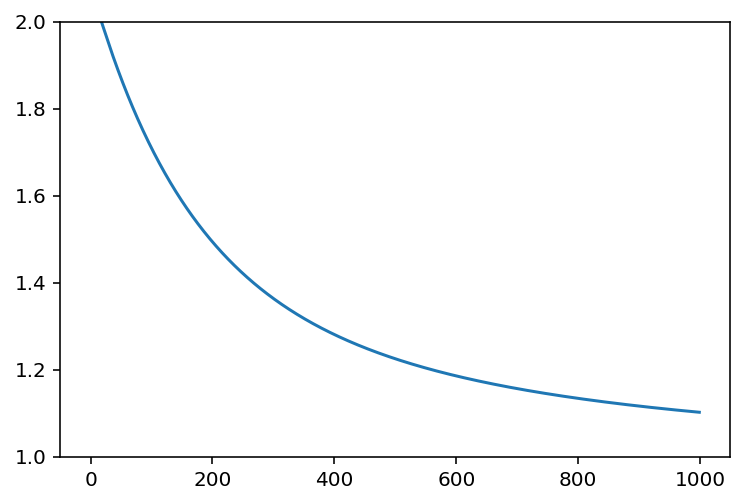

In [118]:
# 그래프
plt.plot(losses)
plt.ylim(1,2)
plt.show()


In [120]:
W, b

(array([ 0.08099871,  0.01555851, -0.03771728,  0.085359  ,  0.39541065,
         0.33987867,  0.60295822,  0.58661328,  0.49250639,  0.82515267,
         0.07581274,  0.03808332]),
 0.45983272478231046)

In [121]:
# test data 

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

0.6690289498236633

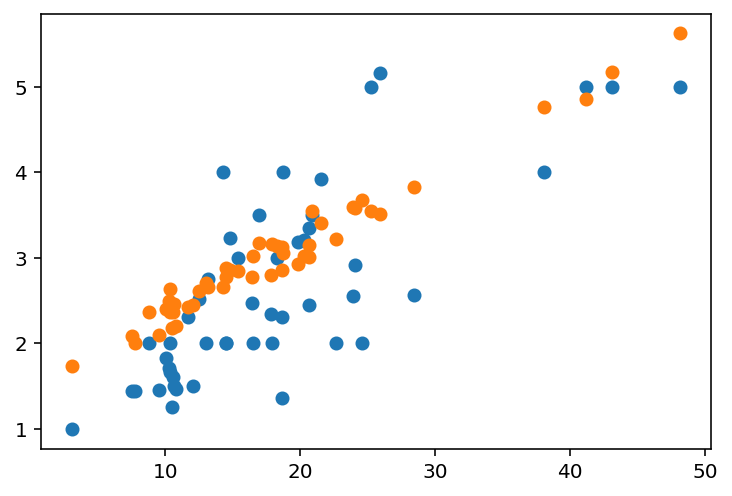

In [122]:
# 그래프 로 그려보기

plt.scatter(X_test[:, 0], y_test) # # 실제
plt.scatter(X_test[:, 0], prediction) # 예측
plt.show()

In [123]:
###

### sklearn 사용

In [124]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]


슝=3


In [128]:
# x, y 분할
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [131]:
# sklearn import 
from sklearn.linear_model import LinearRegression

# model init
model = LinearRegression()



In [132]:
# model 에 train data 주입( 학습)
model.fit(X_train, y_train)

LinearRegression()

In [133]:
# 학습된 모델에 test data 주입하여 예측 결과 도출
predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [134]:
# 모델의 성능평가(오차, mse 활용)
from sklearn.metrics import mean_squared_error

# 실제 값과 예측값을 넣어 모델의 mse 도출
mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436103

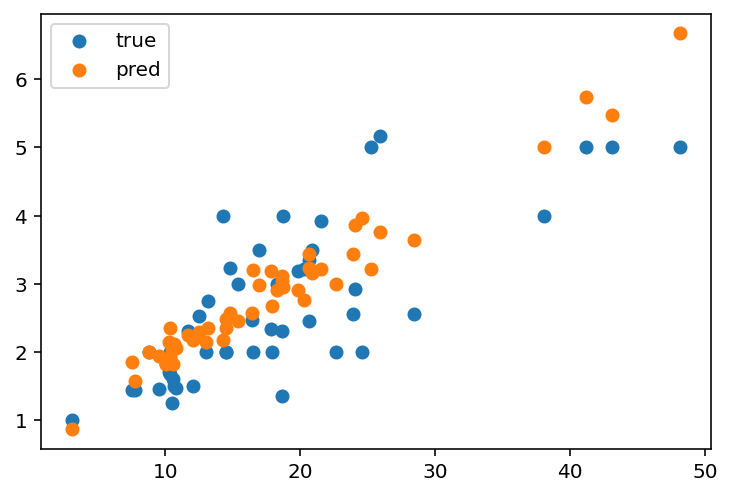

In [137]:
# 그래프로

plt.scatter(X_test[:, 0], y_test, label="true") # x- y실제값
plt.scatter(X_test[:, 0], predictions, label="pred")# x-y예측값
plt.legend() # 범례
plt.show()